### Import

In [377]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


### Data Preprocessing

In [378]:
data_cleaning = data.copy()

#불필요한 칼럼 drop
data_cleaning = data_cleaning[['Q1.1','Q1.2','Q1.8','Q1.10','Q1.11','Q1.13','Q1.21','Q1.22','Q1.25','Q1.29',
                               'Q2.Cluster','Q3','Q4','Q8','Q9.1','Q9.2','Q9.3','Q9.4','Q9.5','Q10','Q17','Q18']]


#데이터 정규화
scaler = StandardScaler()
data_cleaning[:] = scaler.fit_transform(data_cleaning[:])
data_cleaning.head()

,Q1.1,Q1.2,Q1.8,Q1.10,Q1.11,Q1.13,Q1.21,Q1.22,Q1.25,Q1.29,...,Q4,Q8,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q17,Q18
0,1.186104,-1.861074,-0.903108,0.679611,-1.269295,2.014297,1.032227,1.340882,1.325295,1.326973,...,3.074166,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,1.218726,-0.709559,1.003205
1,-1.254650,-0.874417,-0.903108,0.679611,-0.400765,0.995377,-0.343261,-0.012509,0.229131,-0.041346,...,-0.397732,-0.387288,-0.460576,0.557970,0.293257,1.544071,0.471260,-0.368565,1.409326,1.003205
2,-1.254650,-1.861074,-2.128008,-0.393800,-1.269295,2.014297,-1.718749,1.340882,0.229131,-0.041346,...,0.470243,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,-0.368565,1.409326,-0.996806
3,1.186104,-0.874417,-0.903108,0.679611,0.467765,2.014297,1.032227,-0.012509,1.325295,1.326973,...,0.904230,-0.387288,0.342648,-1.329666,0.293257,-0.165621,-1.434784,-0.368565,1.409326,-0.996806
4,-0.034273,-0.874417,0.321792,0.679611,1.336295,2.014297,-0.343261,-0.012509,0.229131,-0.041346,...,0.470243,-0.387288,-0.460576,-0.385848,-0.747009,-0.165621,-0.481762,-0.368565,-0.709559,-0.996806


### PCA

In [379]:
data_pca = data_cleaning.copy()

<AxesSubplot:>

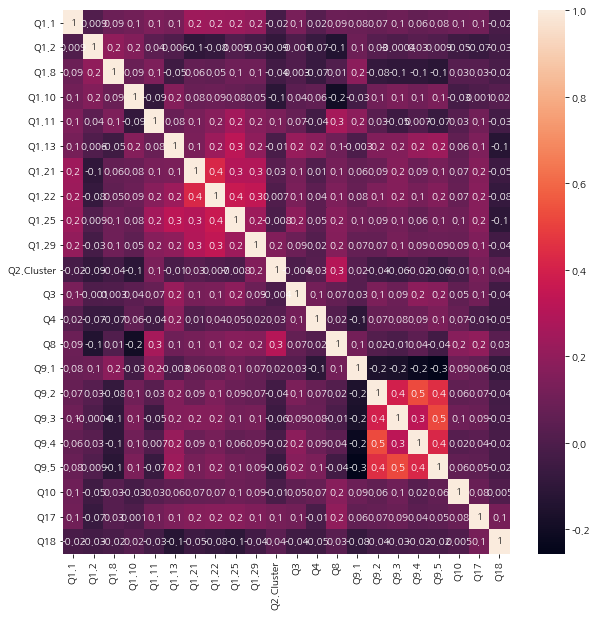

In [380]:
%matplotlib inline
corr = data_pca.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1g')

In [381]:
#시각화를 위해 차원축소
pca = PCA(n_components=2)
pca.fit(data_pca)
pca_transformed = pca.transform(data_pca)

In [382]:
data_pca['pca_x'] = pca_transformed[:,0]
data_pca['pca_y'] = pca_transformed[:,1]

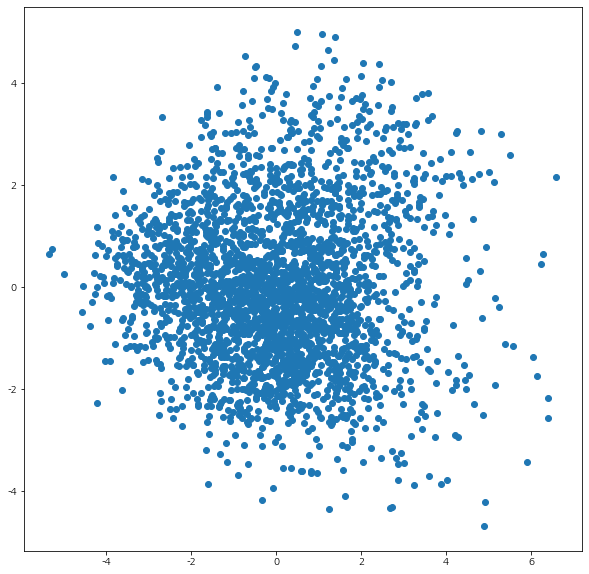

In [383]:
#데이터 살펴보기
plt.figure(figsize=(10,10))
plt.scatter(data_pca['pca_x'],data_pca['pca_y'])

In [384]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 22)


Text(0, 0.5, 'pc')

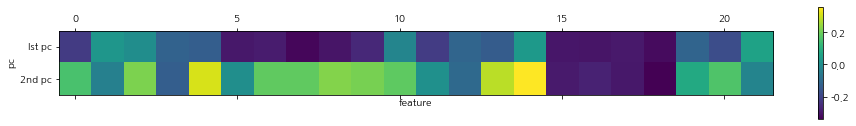

In [385]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["lst pc", "2nd pc"])
plt.colorbar()
plt.xlabel("feature")
plt.ylabel("pc")

In [386]:
data_pca1 = data_pca.copy()
data_pca2 = data_pca.copy()
data_pca3 = data_pca.copy()

## 군집화

### K-means

In [387]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, random_state = 1422)
kmeans.fit(data_pca1)

KMeans(max_iter=500, n_clusters=3, random_state=1422)

In [388]:
print(kmeans.labels_)

[1 1 1 ... 2 2 2]


In [389]:
data_pca1['cluster'] = kmeans.labels_ 
data_pca1.tail()

,Q1.1,Q1.2,Q1.8,Q1.10,Q1.11,Q1.13,Q1.21,Q1.22,Q1.25,Q1.29,...,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q17,Q18,pca_x,pca_y,cluster
2808,1.186104,-1.861074,-2.128008,-1.467211,-0.400765,-2.061386,1.032227,1.340882,1.325295,-2.777985,...,0.557970,1.333522,-0.165621,1.424281,-0.141809,-0.709559,-0.996806,-1.082711,-0.255779,1
2809,-2.475027,-1.861074,-3.352908,-1.467211,1.336295,-2.061386,-4.469725,-1.365900,-3.059363,-4.146305,...,-0.385848,-1.787275,1.544071,-2.387805,-0.549969,-0.709559,-0.996806,6.392859,-2.163939,2
2810,-1.254650,0.112240,-0.903108,-0.393800,0.467765,-0.023544,-0.343261,-1.365900,-0.867034,-0.041346,...,0.557970,-0.747009,0.689225,0.471260,-0.028431,-0.709559,-0.996806,0.923104,-1.313111,2
2811,-0.034273,-0.874417,0.321792,-0.393800,0.467765,-0.023544,-1.718749,-0.012509,0.229131,-2.777985,...,-0.385848,-0.747009,-0.165621,-0.481762,-1.003481,-0.709559,-0.996806,1.730799,-2.049892,2
2812,1.186104,2.085554,1.546692,1.753022,-2.137825,-2.061386,-1.718749,-1.365900,-1.963198,1.326973,...,1.501788,0.293257,-1.875312,-1.434784,1.218726,-0.709559,-0.996806,2.151027,-1.778515,2


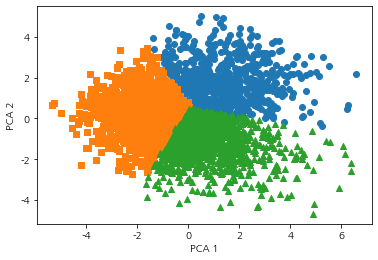

In [390]:
marker0_ind = data_pca1[data_pca1['cluster']==0].index
marker1_ind = data_pca1[data_pca1['cluster']==1].index
marker2_ind = data_pca1[data_pca1['cluster']==2].index

plt.scatter(x=data_pca1.loc[marker0_ind, 'pca_x'], y=data_pca1.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=data_pca1.loc[marker1_ind, 'pca_x'], y=data_pca1.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=data_pca1.loc[marker2_ind, 'pca_x'], y=data_pca1.loc[marker2_ind, 'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

#### 군집 평가

In [391]:
score_samples = silhouette_samples(data_pca1, data_pca1['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (2813,)


In [392]:
data_pca1['silhouette_coeff'] = score_samples

average_score = silhouette_score(data_pca1, data_pca1['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.6f}'.format(average_score))
data_pca1.head(3)

붓꽃 데이터 세트 Silhouette Analysis Score:0.140904


,Q1.1,Q1.2,Q1.8,Q1.10,Q1.11,Q1.13,Q1.21,Q1.22,Q1.25,Q1.29,...,Q9.3,Q9.4,Q9.5,Q10,Q17,Q18,pca_x,pca_y,cluster,silhouette_coeff
0,1.186104,-1.861074,-0.903108,0.679611,-1.269295,2.014297,1.032227,1.340882,1.325295,1.326973,...,0.293257,0.689225,0.47126,1.218726,-0.709559,1.003205,-3.288596,-0.159681,1,0.219508
1,-1.254650,-0.874417,-0.903108,0.679611,-0.400765,0.995377,-0.343261,-0.012509,0.229131,-0.041346,...,0.293257,1.544071,0.47126,-0.368565,1.409326,1.003205,-0.909797,-1.403564,1,0.013793
2,-1.254650,-1.861074,-2.128008,-0.393800,-1.269295,2.014297,-1.718749,1.340882,0.229131,-0.041346,...,0.293257,0.689225,0.47126,-0.368565,1.409326,-0.996806,-1.492377,-1.187963,1,0.079322


In [393]:
data_pca1.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.154447
1    0.141849
2    0.132139
Name: silhouette_coeff, dtype: float64

In [394]:
print(silhouette_score(data_pca1.iloc[:,-4:-2], kmeans.labels_))

0.3655943006056219


In [395]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

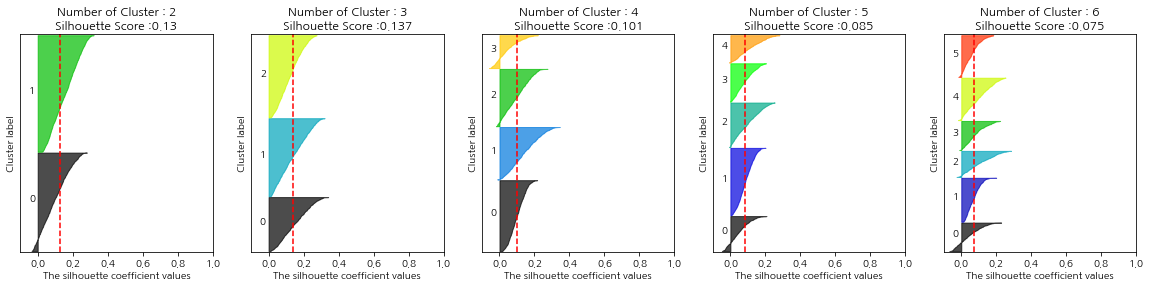

In [347]:
visualize_silhouette([2, 3, 4, 5, 6], data_pca1)

### GMM

In [348]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type = 'full', random_state=1422).fit(data_pca2)
gmm_cluster_labels = gmm.predict(data_pca2)

data_pca2['gmm_cluster'] = gmm_cluster_labels

In [349]:
data_pca2['ftr1'] = pca_transformed[:,0]
data_pca2['ftr2'] = pca_transformed[:,1]

In [350]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

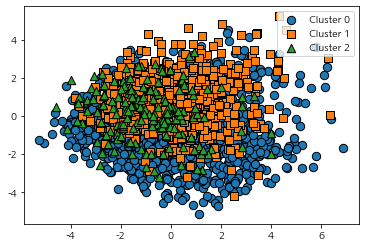

In [351]:
visualize_cluster_plot(gmm, data_pca2, 'gmm_cluster', iscenter=False)

In [352]:
score_samples = silhouette_samples(data_pca2, data_pca2['gmm_cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (2813,)


In [353]:
data_pca2['silhouette_coeff'] = score_samples

average_score = silhouette_score(data_pca2, data_pca2['gmm_cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.6f}'.format(average_score))
data_pca2.head(3)

붓꽃 데이터 세트 Silhouette Analysis Score:0.030983


,Q1.1,Q1.2,Q1.8,Q1.10,Q1.11,Q1.13,Q1.21,Q1.22,Q1.25,Q1.29,...,Q10,Q15,Q17,Q18,pca_x,pca_y,gmm_cluster,ftr1,ftr2,silhouette_coeff
0,1.186104,-1.861074,-0.903108,0.679611,-1.269295,2.014297,1.032227,1.340882,1.325295,1.326973,...,1.218726,-0.474762,-0.709559,1.003205,-3.257740,-0.257582,1,-3.257740,-0.257582,-0.066832
1,-1.254650,-0.874417,-0.903108,0.679611,-0.400765,0.995377,-0.343261,-0.012509,0.229131,-0.041346,...,-0.368565,-1.346503,1.409326,1.003205,-1.236455,1.495551,0,-1.236455,1.495551,-0.024039
2,-1.254650,-1.861074,-2.128008,-0.393800,-1.269295,2.014297,-1.718749,1.340882,0.229131,-0.041346,...,-0.368565,-1.346503,1.409326,-0.996806,-1.792144,1.210848,0,-1.792144,1.210848,-0.013732


In [354]:
data_pca2.groupby('gmm_cluster')['silhouette_coeff'].mean()

gmm_cluster
0    0.015102
1    0.069543
2    0.077073
Name: silhouette_coeff, dtype: float64

### DBSCAN

### 계층적 군집분석

In [248]:
data_pca3.head(3)

,Q1.1,Q1.4,Q1.13,Q1.25,Q2.Cluster,Q3,Q4,Q8,Q10,Q15,Q17,Q18,pca_x,pca_y
0,1.186104,1.353462,2.014297,1.325295,0.587613,-0.215617,3.074166,0.859211,1.218726,-0.474762,-0.709559,1.003205,-3.167619,0.056914
1,-1.254650,0.133568,0.995377,0.229131,0.587613,-0.215617,-0.397732,-0.387288,-0.368565,-1.346503,1.409326,1.003205,-0.507575,-0.200173
2,-1.254650,0.133568,2.014297,0.229131,0.587613,1.204830,0.470243,0.859211,-0.368565,-1.346503,1.409326,-0.996806,-2.100211,-0.840380


In [249]:
from sklearn.cluster import AgglomerativeClustering

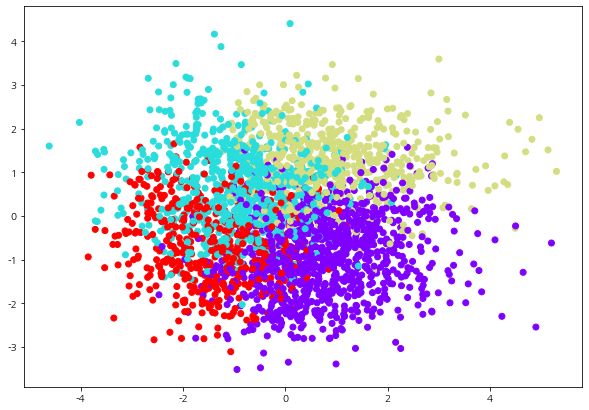

In [250]:
#와드연결법
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_pca3)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca3['pca_x'], data_pca3['pca_y'], c=cluster.labels_, cmap='rainbow')

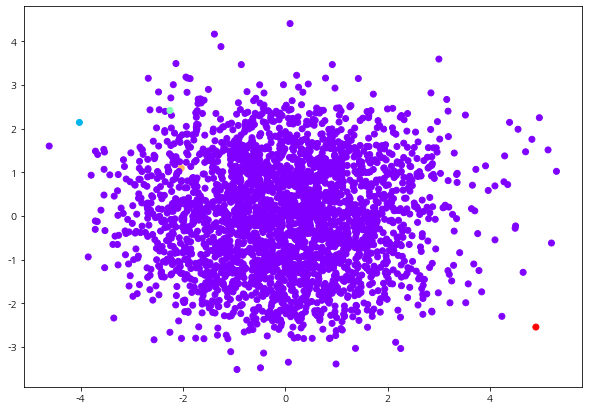

In [251]:
# 단일연결법
cluster_2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
cluster_2.fit_predict(data_pca3)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca3['pca_x'], data_pca3['pca_y'], c=cluster_2.labels_, cmap='rainbow')

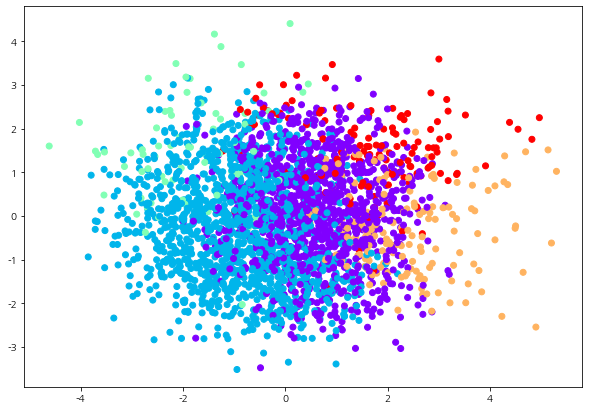

In [252]:
# 완전연결법
cluster_3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster_3.fit_predict(data_pca3)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca3['pca_x'], data_pca3['pca_y'], c=cluster_3.labels_, cmap='rainbow')

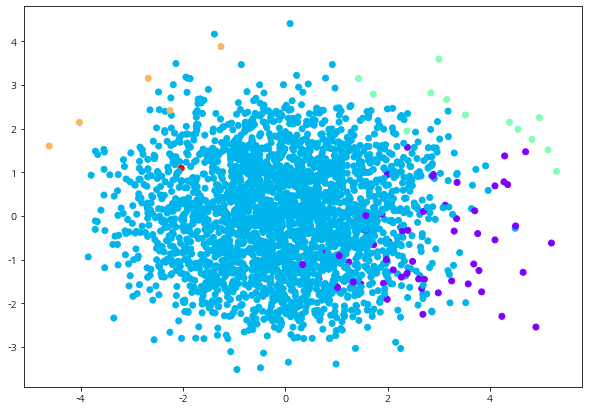

In [253]:
# 평균연결법
cluster_4 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
cluster_4.fit_predict(data_pca3)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca3['pca_x'], data_pca3['pca_y'], c=cluster_4.labels_, cmap='rainbow')